In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
data.drop('id', axis=1, inplace=True)

In [4]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
data.groupby(['loan_status']).size()

loan_status
0    50295
1     8350
dtype: int64

In [6]:
cat_features = data.select_dtypes(include=['object'])
print(cat_features.nunique())
print(cat_features.apply(lambda x: x.unique()))

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64
person_home_ownership                             [RENT, OWN, MORTGAGE, OTHER]
loan_intent                  [EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO...
loan_grade                                               [B, C, A, D, E, F, G]
cb_person_default_on_file                                               [N, Y]
dtype: object


In [7]:
print(data['loan_intent'].unique())

['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


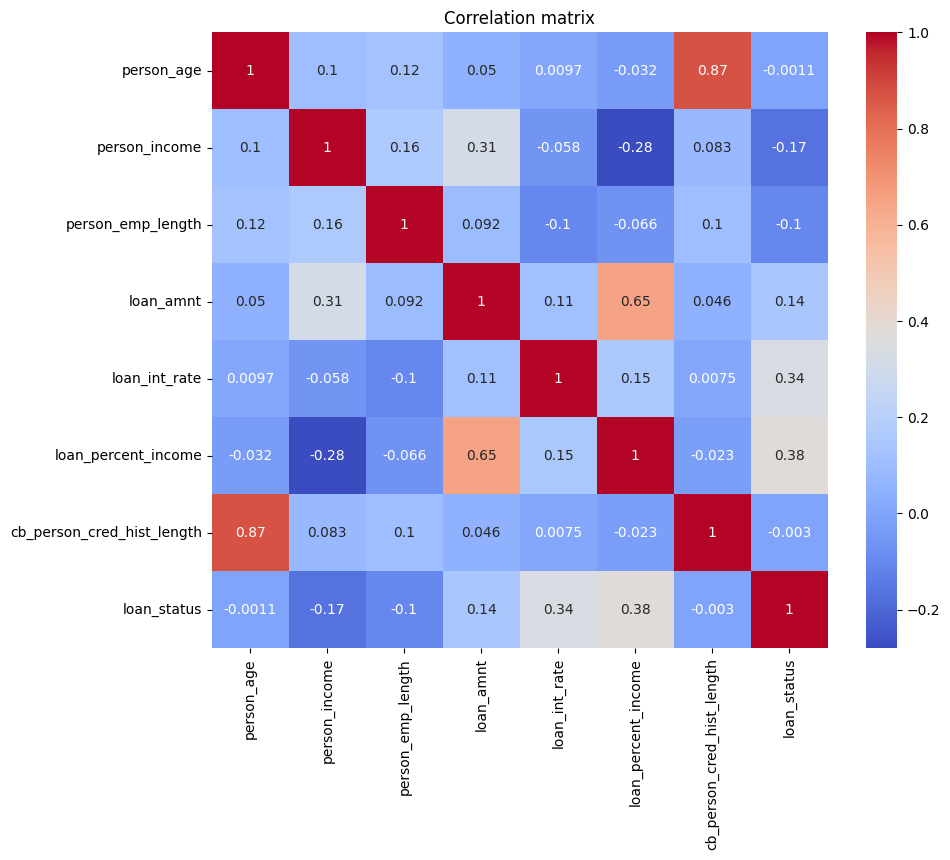

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

In [9]:
data.drop(['cb_person_cred_hist_length'], axis=1, inplace=True)

In [10]:
num_features.drop(['cb_person_cred_hist_length'], axis=1, inplace=True)

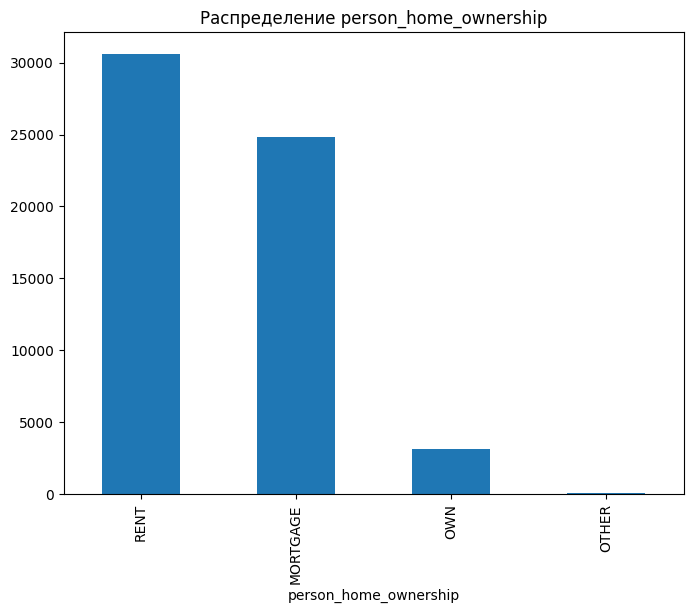

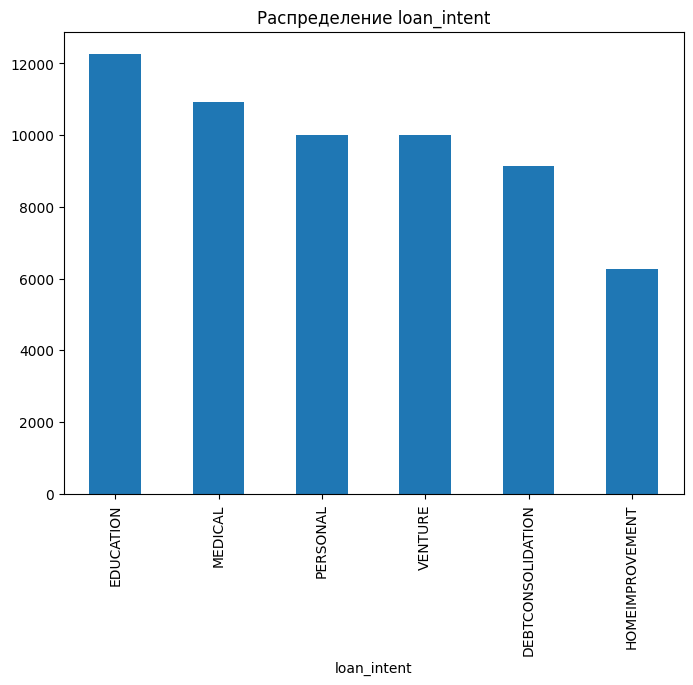

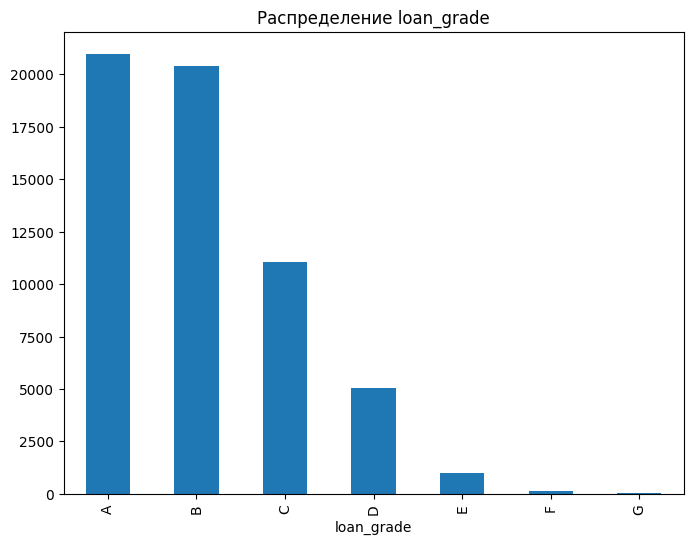

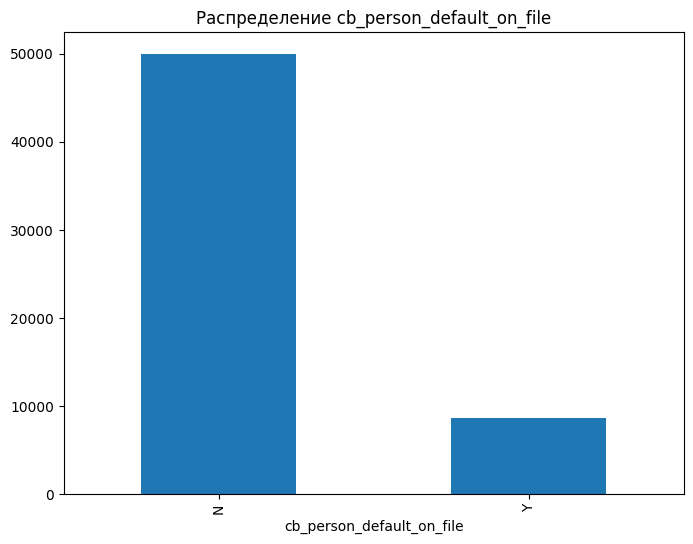

In [11]:
for col in cat_features.columns:
    plt.figure(figsize=(8, 6))
    cat_features[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение {col}')
    plt.show()

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(cat_features)
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoded_df

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58641,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58642,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58643,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
num_features.isna().sum()

person_age             0
person_income          0
person_emp_length      0
loan_amnt              0
loan_int_rate          0
loan_percent_income    0
loan_status            0
dtype: int64

In [14]:
data2 = pd.concat([num_features, encoded_df], axis=1)
data2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,37,35000,0.0,6000,11.49,0.17,0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22,56000,6.0,4000,13.35,0.07,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,29,28800,8.0,6000,8.90,0.21,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,70000,14.0,12000,11.11,0.17,0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22,60000,2.0,6000,6.92,0.10,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = data2['loan_status']
data2.drop('loan_status', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
X_train.shape

(43983, 21)

In [17]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)


param_grid = {
    'iterations': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

baseline = CatBoostClassifier(random_state=42, verbose=0)
random_search = RandomizedSearchCV(
    estimator=baseline,
    param_distributions=param_grid,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    verbose=2
)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)
f1 = f1_score(y_test, predictions)
print(f'Test F1-score: {f1:.4f}')
print("Best params:", random_search.best_params_)
baseline = best_model


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test F1-score: 0.8153
Best params: {'learning_rate': 0.2, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 4}


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()

        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.d1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.d2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.d1(x)
        
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.d2(x)
        
        x = self.fc3(x)
        return x

In [19]:
from torch.utils.data import TensorDataset, DataLoader

X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32)

batch_size = 128

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

# from torch.utils.data import WeightedRandomSampler

# class_counts = np.bincount(y_train_t.numpy().astype(int))  
# weights = 1.0 / class_counts
# samples_weights = weights[y_train_t.numpy().astype(int)]

# sampler = WeightedRandomSampler(samples_weights, len(samples_weights), replacement=True)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [20]:
y_train_t

tensor([0., 1., 0.,  ..., 0., 0., 0.])

In [21]:
def train(model, optimizer, scheduler, criterion, num_epochs=10, device=torch.device('cuda')):
    print(device)
    training_loss = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for batch in train_loader:
            X_batch, y_batch = batch
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(train_loader)
        training_loss.append(epoch_loss)
        
        if epoch % 1 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    return training_loss

In [22]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
def evaluate_model(model, test_loader, device="cuda"):
    model.eval()
    y_true = []
    y_scores = []
    
    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    
            outputs = model(X_batch).squeeze(1)
            y_scores.extend(torch.sigmoid(outputs).cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    threshold = 0.4
    y_pred = (np.array(y_scores) > threshold)
    print(f"Classification Report at Threshold {threshold:.4f}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

cuda
Epoch [1/20], Loss: 0.3848
Epoch [2/20], Loss: 0.2440
Epoch [3/20], Loss: 0.2251
Epoch [4/20], Loss: 0.2183
Epoch [5/20], Loss: 0.2134
Epoch [6/20], Loss: 0.2112
Epoch [7/20], Loss: 0.2093
Epoch [8/20], Loss: 0.2061
Epoch [9/20], Loss: 0.2058
Epoch [10/20], Loss: 0.2039
Epoch [11/20], Loss: 0.2037
Epoch [12/20], Loss: 0.2012
Epoch [13/20], Loss: 0.2005
Epoch [14/20], Loss: 0.1990
Epoch [15/20], Loss: 0.1989
Epoch [16/20], Loss: 0.1996
Epoch [17/20], Loss: 0.1976
Epoch [18/20], Loss: 0.1965
Epoch [19/20], Loss: 0.1952
Epoch [20/20], Loss: 0.1963


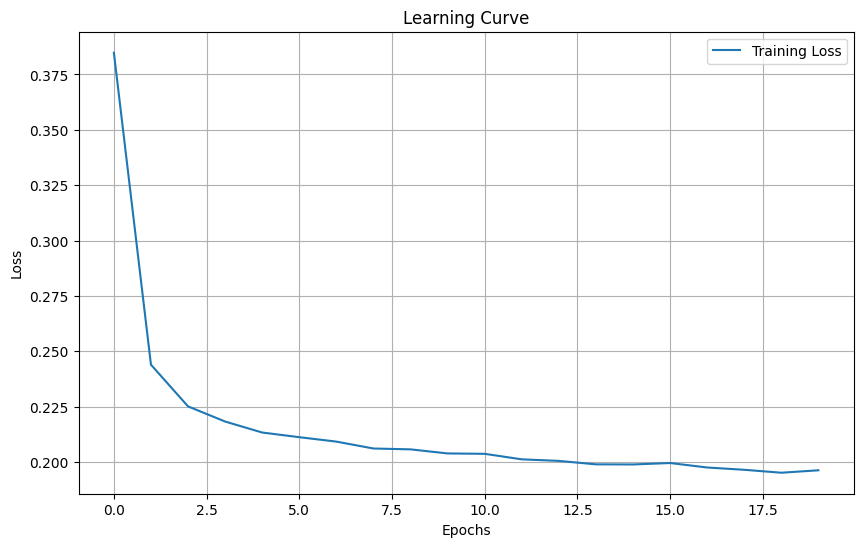

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = X_train_t.shape[1]
model = Model(input_dim).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-5)
num_epochs = 20
# pos_weight = torch.tensor([(len(y_train) - sum(y_train)) / sum(y_train)])
# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(device))
criterion = nn.BCEWithLogitsLoss()
#criterion = FocalLoss(alpha=0.7, gamma=1.0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=num_epochs*len(train_loader), gamma=0.1)

loss_history = train(model, optimizer, scheduler, criterion, num_epochs, device)
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


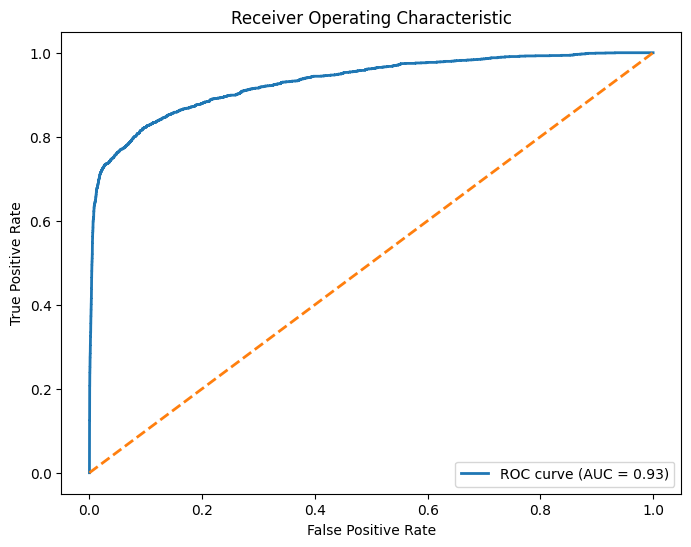

Classification Report at Threshold 0.4000:
Accuracy:  0.9397
Precision: 0.8290
Recall:    0.7265
F1-score:  0.7744
ROC-AUC:   0.9307


In [24]:
evaluate_model(model, test_loader)

In [25]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

id_column = test_data['id']
test_data = test_data.drop(columns=['id', 'cb_person_cred_hist_length'], axis=1)
cat_features_test = test_data.select_dtypes(include=['object'])
encoded_test = encoder.transform(cat_features_test)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out())
test_num_features = test_data.select_dtypes(include=['float64', 'int64'])
test_data_processed = pd.concat([test_num_features, encoded_test_df], axis=1)
test_data_processed = scaler.transform(test_data_processed)

test_data_t = torch.tensor(test_data_processed, dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    predictions = model(test_data_t).squeeze(1)

predicted_probabilities = torch.sigmoid(predictions).cpu().numpy()

predicted_labels = (predicted_probabilities > 0.5).astype(int)
submission = pd.DataFrame({
    'id': id_column,
    'loan_status': predicted_labels.flatten()
})
submission.to_csv('submission.csv', index=False)